## Importações e Dataset

In [1]:
# Importação das bibliotécas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd '/content/drive/MyDrive/datasets'

Mounted at /content/drive
/content/drive/MyDrive/datasets


Agora vamos carregar nossa base de dados e usar a função 'head' para ter o primeiro contato com os dados que vamos lidar

In [3]:
# Carregando dataset
airbnb=pd.read_csv("AB_NYC_2019.csv")

airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Compreendendo, organizando e limpando dados

A seguir verificamos a quantidade de linhas e colunas do nosso dataset para entender o tamanho com o qual estamos trabalhando

In [4]:
# Dimensão do dataset
airbnb.shape

(48895, 16)

In [5]:
# Verificando o tipo de cada coluna do dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Também precisamos saber da existência de potenciais valores ausentes nos dados

In [6]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Com essa primeira compreenção dos dados, podemos ver que essas 16 colunas podem fornecer uma quantidade muito rica de informações para a exploração desse conjunto de dados. Já vemos alguns valores ausentes, o que exigirá manutenção e melhor análise deles

name

In [7]:
airbnb.name.unique()[:5]

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !',
       'Cozy Entire Floor of Brownstone',
       'Entire Apt: Spacious Studio/Loft by central park'], dtype=object)

host_name

In [8]:
airbnb.host_name.unique()[:5]

array(['John', 'Jennifer', 'Elisabeth', 'LisaRoxanne', 'Laura'],
      dtype=object)

last_review

In [9]:
airbnb.last_review.unique()[:5]

array(['2018-10-19', '2019-05-21', nan, '2019-07-05', '2018-11-19'],
      dtype=object)

reviews_per_month

In [10]:
airbnb.reviews_per_month.unique()[:5]

array([0.21, 0.38,  nan, 4.64, 0.1 ])

É possível notar que as colunas onde há dados ausentes não são necessáriamente expresivas para nossas análises futuras, exceto 'name' e talvez reviews_per_month.

Diante disso, optamos apenas por eliminar as colunas 'host_name' e 'last_review'. A explicação é que 'host_name' pode ser facilmente substituída pela coluna 'host_id', e 'last_review' não apresenta muita utilidade de análise.

In [11]:
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

airbnb.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


 No caso da coluna 'reviews_per_month', que também possui valores NaN, preferimos substituir seus valores por 0, pois nesse caso a ausência de valores pode ser interpretada como ausência de reviews no mês.

In [12]:
# Substituir NaN por 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)

# Verificando a existencia de valores nulos após sustituição
airbnb.reviews_per_month.isnull().sum()

0

### Compreendendo colunas

Aqui vamos buscar entender o que há em algumas das colunas categóricas que consideramos importantes para futuras análises

neighbourhood_group

In [13]:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

neighbourhood

In [14]:
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [15]:
len(airbnb.neighbourhood.unique())

221

room_type

In [16]:
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Análise

Agora que já temos um melhor entendimento dos nossos dados, poderemos fazer algumas análises mais simples e a medida que nos aprofundarmos nos dados, também vamos fazer análises mais complexas

Primeiro vamos buscar entender os anfitriões com mais anúncios no Airbnb

In [17]:
# contagem dos anúncios dos 10 principais anfitriões
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

top_host=airbnb.host_id.value_counts().head(10)
top_host

top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'Host_ID'}, inplace=True)
top_host_df

,Host_ID,count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


Certo! Também é importante entendermos melhor sobre nossos bairros ou 'neighbourhood_group' (Brooklyn, Manhattan, Queens, Staten Island e Bronx).
Por isso vamos analisar de forma estatística cada bairro com seus preços

In [18]:
# Bairros
nei_list = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
filtered_airbnb = airbnb[airbnb['neighbourhood_group'].isin(nei_list)]

# Calcular as estatísticas de preço para cada bairro
grouped = filtered_airbnb.groupby('neighbourhood_group')['price'].describe(percentiles=[.25, .50, .75])

stats_to_keep = ['min', '25%', '50%', '75%', 'max']
grouped = grouped.loc[:, stats_to_keep]

stat_df = grouped.T
stat_df.columns = nei_list
stat_df.rename(index={'min': 'Min', '25%': '25%', '50%': '50%', '75%': '75%', 'max': 'Max'}, inplace=True)

# Visualizar o DataFrame final
print(stat_df)


      Bronx  Brooklyn  Manhattan   Queens  Staten Island
Min     0.0       0.0        0.0     10.0           13.0
25%    45.0      60.0       95.0     50.0           50.0
50%    65.0      90.0      150.0     75.0           75.0
75%    99.0     150.0      220.0    110.0          110.0
Max  2500.0   10000.0    10000.0  10000.0         5000.0


Raídamente nós podemos ver que há valores extremos comparando cada quartil e seus Max e Min. Portanto, precisamos remover esses valores.

Além de amenizar o impactos desses valores extremos nas análises, vamos usar um gráfico de violino por ser útil para entender rapidamente como os preços variam entre diferentes 'neighbourhood_group' e identificar padrões ou anomalias nos dados de preços de aluguel

Text(0.5, 1.0, 'Densidade e distribuição de preços para cada neighberhood_group')

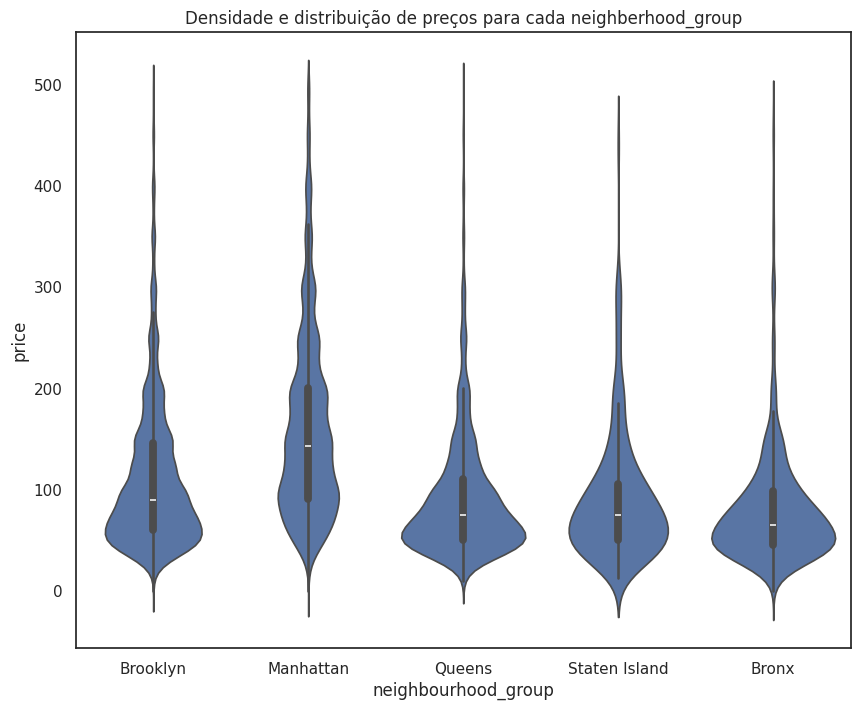

In [19]:
# Selecionando apenas preços de aluguel abaixo de $500
airbnb500=airbnb[airbnb.price < 500]

# violinplot
viz_2=sns.violinplot(data=airbnb500, x='neighbourhood_group', y='price')
viz_2.set_title('Densidade e distribuição de preços para cada neighberhood_group')

Interpretações dos bairros (neighbourhood_group):
- Brooklyn: Tem uma distribuição mais ampla de preços, com a maioria das listagens concentradas em uma faixa de preços moderada.
- Manhattan: Apresenta uma distribuição mais ampla e variada, com preços mais altos (preço médio de $150) e maior dispersão.
- Queens: Mostra uma distribuição mais concentrada em preços mais baixos, com menos variabilidade.
- Staten Island: Tem uma distribuição mais compacta e preços relativamente baixos.
- Bronx: Apresenta uma distribuição de preços similar a Queens, com a maioria das listagens concentradas em uma faixa de preço baixa.


Esta distribuição e densidade de preços eram completamente esperadas; por exemplo, já que não é segredo que Manhattan é um dos lugares mais caros do mundo para se viver, enquanto o Bronx, por outro lado, parece ter padrões de vida mais baixos.

Para tirarmos uma melhor conclusão, vamos utilizar a latitude e longitude de cada anúncio com seus respectivos preços sobreposto ao mapa de NY para mostrar a distribuição dos preços das listagens

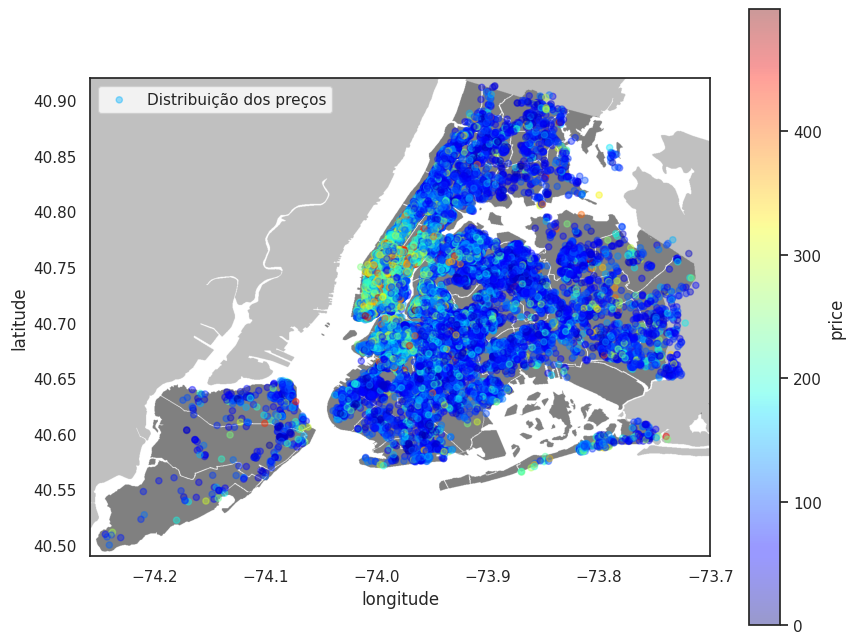

In [20]:
import urllib
from io import BytesIO

plt.figure(figsize=(10, 8))

# Mapa de NY
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
response = urllib.request.urlopen(url)
image_data = response.read()
nyc_img = plt.imread(BytesIO(image_data))

plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()

# scatterplot
airbnb500.plot(kind='scatter', x='longitude', y='latitude', label='Distribuição dos preços', c='price', ax=ax,
               cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()


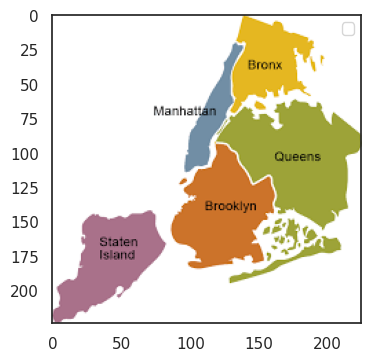

In [21]:
import urllib.request
from io import BytesIO
from PIL import Image

# Imagem do mapa de NY
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwvNLk0FRjJMcD_TfqY_DkmcHZejj8viX5MQ&s'
response = urllib.request.urlopen(url)
image_data = response.read()
image = Image.open(BytesIO(image_data))

plt.figure(figsize=(5, 4))

plt.imshow(image, zorder=0)
ax = plt.gca()

plt.legend()
plt.show()

A concentração de preços mais altos em Manhattan é claramente visível, assim como no Brooklyn. Enquanto outras áreas, como Queens e Bronx, têm uma maior concentração de pontos azuis, indicando preços mais baixos.

Essa observação só reafirma o que foi percebido no plot do violino.

Ok! Agora vamos analisar a relação entre os preços e os tipos de quartos

<ipython-input-22-971afda14981>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='price', data=avg_price_by_room_type, palette='viridis')


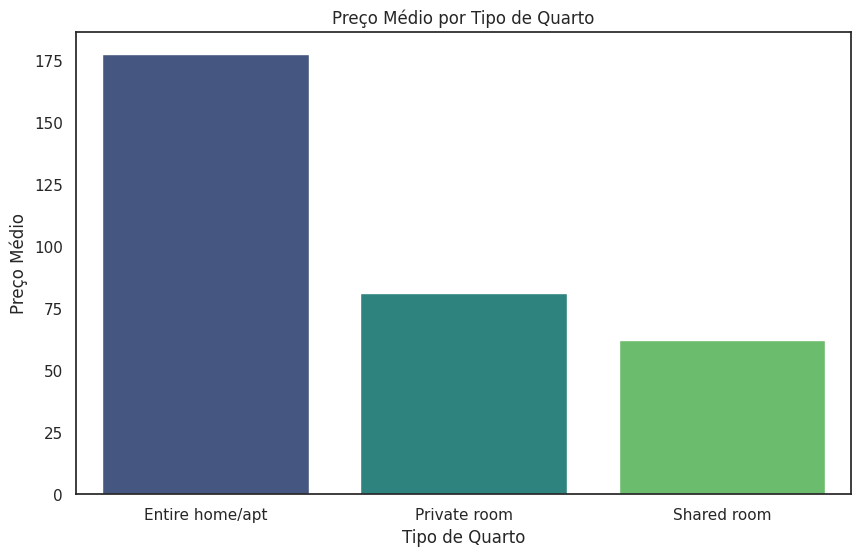

In [22]:
avg_price_by_room_type = airbnb500.groupby('room_type')['price'].mean().reset_index()

# Plotar o preço médio por tipo de quarto
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=avg_price_by_room_type, palette='viridis')
plt.title('Preço Médio por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço Médio')
plt.show()

A diferença entre o preço médio de casas/apartamentos (Entire home/apt) e os outros tipos de quarto é substancial, o que talvez indique a existência de muitos outliers. Já os quartos privados (Private room) são significativamente mais caros que os quartos compartilhados (Shared room), mas ainda consideravelmente mais baratos que alugar um espaço inteiro. Isso pode ser devido ao equilíbrio entre privacidade e custo.

<ipython-input-23-1da38d88289d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=airbnb500, palette='viridis')


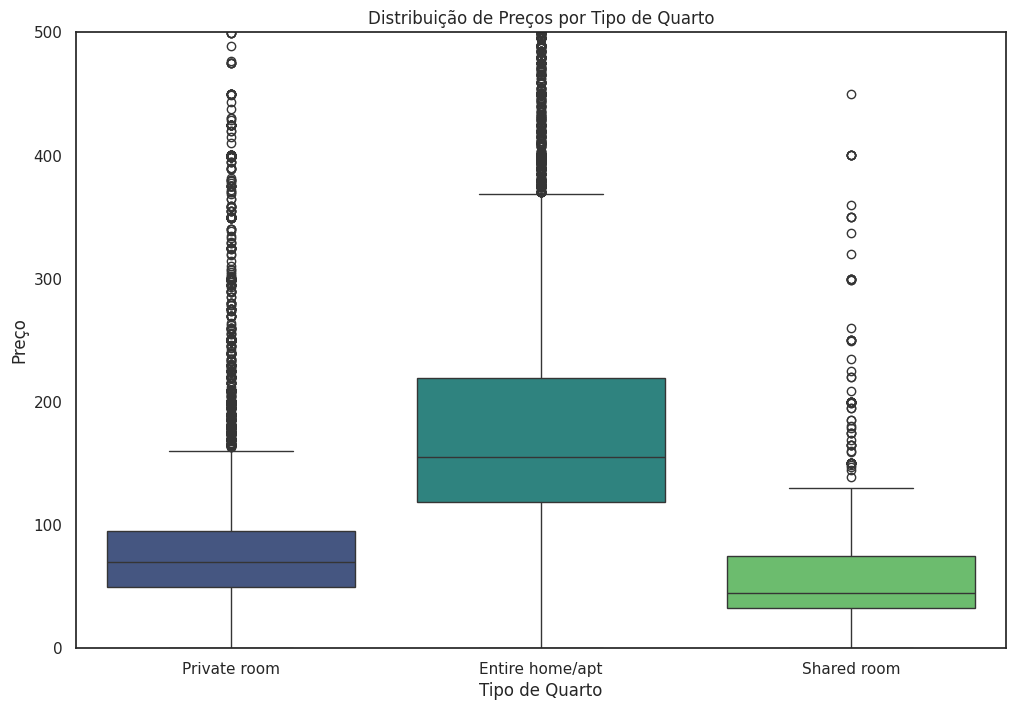

In [23]:
# Plotar a distribuição dos preços por tipo de quarto usando box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='price', data=airbnb500, palette='viridis')
plt.title('Distribuição de Preços por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço')
plt.ylim(0, 500)
plt.show()

Comparações:
- Preço Médio:
  - Casas/apartamentos (Entire home/apt) são, em média, os mais caros.
  - Quartos privados (Private room) têm um preço médio intermediário.
  - Quartos compartilhados (Shared room) são os mais baratos, em média.

- Variabilidade dos Preços:
  - Casas/apartamentos (Entire home/apt) têm a maior variabilidade de preços, como indicado pela largura do IQR e pelo número de outliers.
  - Quartos privados (Private room) têm uma variabilidade de preços moderada.
  - Quartos compartilhados (Shared room) têm a menor variabilidade de preços.

- Outliers:
Todos os tipos de quarto têm outliers, mas a quantidade e o valor dos outliers são mais altos para casas/apartamentos (como imaginávamos) e quartos privados.